In [85]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression



# Clustering

### K-Means

(2000, 2)


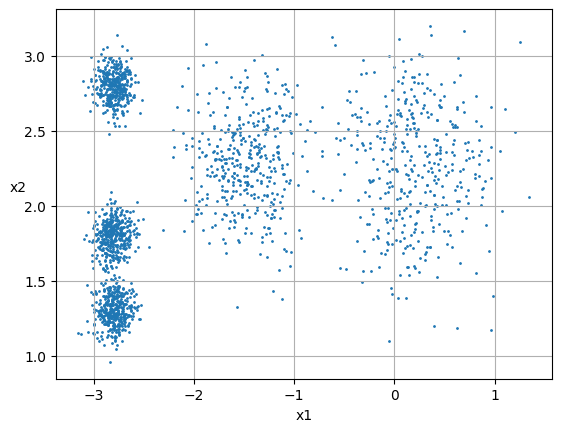

In [20]:
# y contains each blob's id (the label) we won't use it (unsupervised)
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
print (X.shape)

plt.scatter(X[:,0], X[:,1], s=1)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.grid()

In [31]:
# Clustering with K means

k = 5
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
y_pred = kmeans.fit_predict(X)

[[-2.80037642  1.30082566]
 [ 0.20876306  2.25551336]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]
 [-2.80389616  1.80117999]]


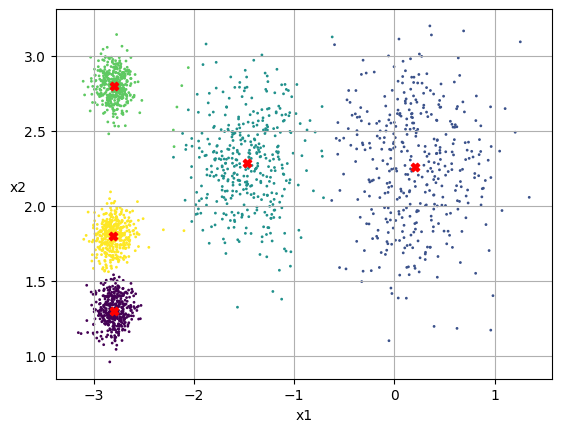

In [32]:
clusters_centers = kmeans.cluster_centers_
print (clusters_centers)

y_pred_int8 = y_pred.astype(np.int8)
plt.scatter(X[:,0], X[:,1], c=y_pred_int8, s=1)
plt.scatter(clusters_centers[:,0], clusters_centers[:,1], marker='X', color="red")
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.grid()

In [35]:
# New examples
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

# Hard clustering - labeling each instance with the cluster it belongs to
y_hard = kmeans.predict(X_new)
print (y_hard)

# Soft clustering - getting the distance between each instance and the clusters centers
y_soft = kmeans.transform(X_new).round(2)
print (y_soft)

[1 1 3 3]
[[2.89 0.33 1.49 2.9  2.81]
 [5.84 2.8  4.48 5.85 5.81]
 [1.71 3.29 1.69 0.29 1.21]
 [1.22 3.22 1.55 0.36 0.73]]


Choosing the optimal number of clusters (elbow method)

In [39]:
# Getting the inertia at each k
inertias = []
for k in range(1,15):
  kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

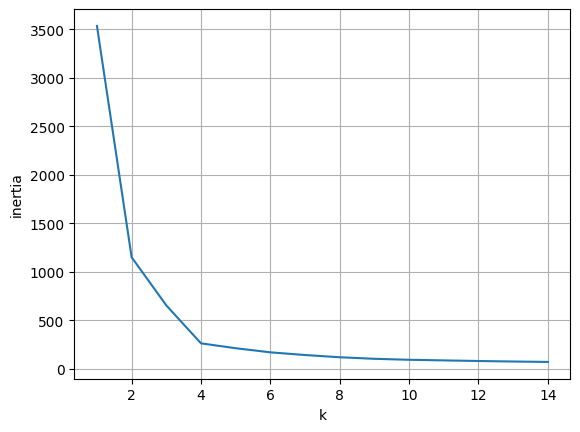

In [43]:
k_range = np.array(range(1,15))

plt.plot(k_range, inertias)
plt.grid()
plt.xlabel("k")
plt.ylabel("inertia")

Choosing the optimal number of clusters (silhouette score)

In [47]:
# Getting the silhouette_score at each k
silhouettes = []
for k in range(2,15):
  kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
  kmeans.fit(X)
  silhouettes.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'silhouette')

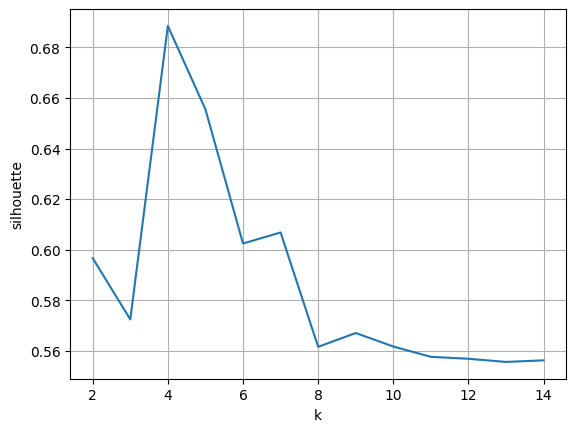

In [48]:
k_range = np.array(range(2,15))

plt.plot(k_range, silhouettes)
plt.grid()
plt.xlabel("k")
plt.ylabel("silhouette")

## Image segmentation using KMeans (color segmentation)

In [50]:
filepath = "./ladybug.png"
image = np.asarray(PIL.Image.open(filepath))

In [52]:
# This is an RGB image. Each pixel gets 3 channels.
# The shape is therefore: height x width x channels
image.shape

(533, 800, 3)

In [79]:
# Flatten the image - keep the channel array and flatten the pixels. We're turning it from a tensor (h,w,c) to a matrix
# (h*w,c). This will be like working with a dataset with 3 features (3 channels) per row.
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# We're using the cluster id as index into the cluster_centers array, essentially replacing each cluster id with
# the cluster's center points. Each center is a coordinate of 3 floats since the data set is 3D after reshaping it.
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

# reshape to image dimensions
segmented_img = segmented_img.reshape(image.shape)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


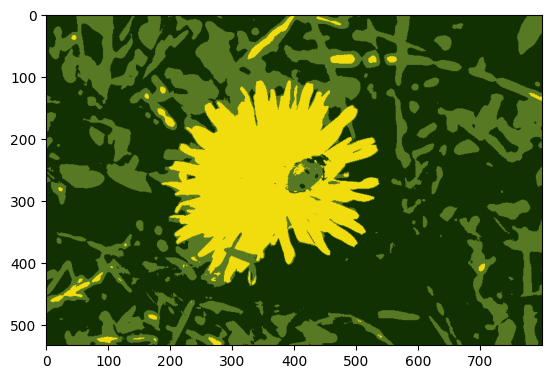

In [80]:
plt.imshow(segmented_img/255)

## Semi supervised learning using KMeans

In [88]:
# using the digits dataset and setting it up such that only 50 instances are labeled
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [89]:
# Getting a baseline performance using a logistic regression algorithm. We want to make sure that after labeling the 
# instances using KMeans, we do better than the baseline. The baseline is training a log reg model on 50 instances
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [90]:
# Baseline score (50 instances)
log_reg.score(X_test, y_test)

0.7481108312342569

In [100]:
# Using KMeans to cluster the images
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)

# X_digits_dist contains distance from each of the k cluster for each instance
X_digits_dist = kmeans.fit_transform(X_train)

# For each centroid (axis=0, columns), get the index of the closest image out of the 1400
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

# Get the digits using the indices
representative_digits = X_train[representative_digit_idx]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


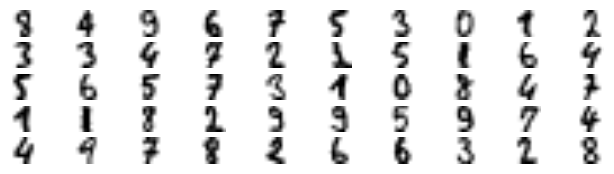

In [116]:
# The image instances that are the closest to the cluster centers
plt.figure(figsize=(8, 2))

for index, digit_img in enumerate(representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(digit_img.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')


In [117]:
# Now we have to manually label these 50 images (in a real semi-supervised scenario we won't have labels to this dataset)
y_representative_digits = np.array([8,4,9,6,7,5,3,0,1,2,3,3,4,7,2,1,5,1,6,4,5,6,5,7,3,1,0,8,4,7,1,1,8,2,9,9,5,9,7,4,4,9,7,8,2,6,6,3,2,8])

In [118]:
# This is where the magic happens...

# Now we need to propagate the labels to all other instances in the same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  # Set all indices where the label is i, set the value to the representative digit at i.
  # For example, all indices where the cluster label is 0, will get set to representative digit 0

  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [123]:
# Major boost to test accuracy from baseline

log_reg = LogisticRegression(solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8639798488664987

In [135]:
# Improving the fit by removing outliers

# We attempt to improve the fit by getting rid of instances that are the furthest from their cluster center

percentile_closest = 99

# For all training examples, get the distance to the closest cluster (which is the index of the cluster label in labels_)
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  # Get the instance indices that are in cluster i
  in_cluster = (kmeans.labels_ == i)
  
  # Get the distances of the instances in cluster i
  cluster_dist = X_cluster_dist[in_cluster]

  # Compute the cutoff distance in which 'percentile_closest' percent of the instances are
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)

  # Mark the instances that are in this cluster and above cutoff as -1
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

# Only instances that their distance is not marked -1 are considered (in the 99th percentile)
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

# What we're left with after removing outliers
print (X_train_partially_propagated.shape)

(1350, 64)


In [136]:
# Another major performance boost

log_reg = LogisticRegression(solver="lbfgs", max_iter=5000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9193954659949622

In [137]:
# Check how many instances we managed to successfully propagate the label to
(y_train_partially_propagated == y_train[partially_propagated]).mean()

1.0